In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


# Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Class names

In [4]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

# Process the data

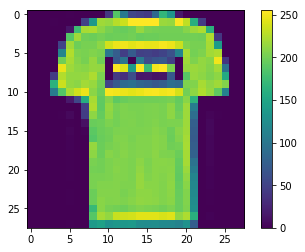

In [5]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Display the first 25 images

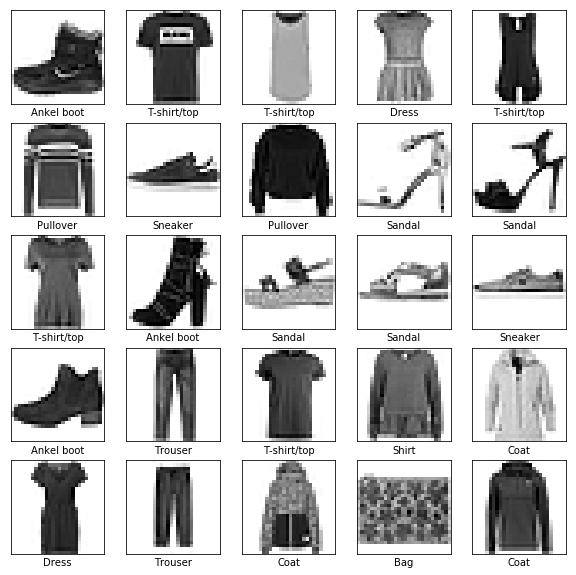

In [6]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

plt.show()

# Build the model

## Set up layers

In [7]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation=tf.nn.relu),
      keras.layers.Dense(10, activation=tf.nn.softmax)
      ])

Instructions for updating:
Colocations handled automatically by placer.


The first layer is the input layer, `tf.keras.Flatten`, which transforms the format of the images from a 2d-array ( of 28 by 28 pixels), to a 1d-array of 784 pixels. *This layers has no parameters to learn; it only reformats the data.

The next two `tf.keras.layers.Dense` layers are **densely-connected, or fully-connected** neural layers. The first has 128 nodes (or neurons) and the second has 10 nodes, which returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 11.3551 - acc: 0.2955
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 11.3797 - acc: 0.2939
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 11.3948 - acc: 0.2930
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 11.3388 - acc: 0.2965
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 11.3388 - acc: 0.2965


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 11.3391 - acc: 0.2965
Test accuracy: 0.2965
